# **Milestone 1**

# Link Dashboard
Klik link [berikut](https://datastudio.google.com/reporting/99f2707b-15e2-4a50-a514-0f5d15ae0c91) untuk langsung menuju ke dashboard.

# i. Introduction

## Identity

### Alda Nesti Talenta Pakpahan <br>
### RMT - 017

# ii. Problem Identify

## ii.1 Topik permasalahan

Topik permasalahan yang akan dibahas dalam notebook ini adalah ***Customer Churn***.

## ii.2 Problem statement

Problem statement: <br>
PT Bank TRX ingin **mengurangi angka churn rate** (persentase pelanggan yang berhenti menggunakan produk/layanan dan beralih ke kompetitor) **tidak lebih dari 20% di 1 tahun kedepan.**

## ii.3 Latar belakang

*Customer churn rate* merupakan persentase konsumen yang berhenti menggunakan layanan atau produk dalam suatu bisnis di quarter tertentu. Persentase pelanggan yang hilang tersebut berpengaruh terhadap *growth rate* perusahaan. *Churn rate* yang tinggi dapat berdampak negatif pada *Monthly Recurring Revenue* (MRR) dan juga dapat menunjukkan ketidakpuasan terhadap suatu produk atau layanan. Sehingga *churn rate* ini merupakan suatu hal penting yang harus diperhatikan dan bahkan saat ini menjadi alasan utama bagi PT Bank TRX untuk mengurangi angka *customer churn rate* tersebut.<br>

Dalam hal ini, Divisi Marketing di perusahaan ini ingin menerapkan strategi apa yang relevan terhadap karakteristik nasabah yang berpotensi *churn* agar strategi tersebut bisa tepat sasaran sehingga tidak membuang banyak waktu, tenaga, dan biaya. Divisi ini juga ingin mengetahui 3 daftar negara dari yang mempunyai angka *churn* tertinggi untuk membuat *time-bound* menjalankan strategi dalam 1 tahun kedepan. Target mereka adalah mengurangi angka *churn rate* sebesar 2% untuk masing-masing negara dalam waktu 4 bulan pertama di negara tertinggi pertama, 4 bulan berikutnya di negara tertinggi kedua dan 4 bulan berikutnya lagi di negara tertinggi ketiga.<br>

Oleh karena itu, Saya sebagai seorang Data Analyst di perusahaan ini diminta untuk mencari tahu karakteristik nasabah-nasabah seperti apa yang berkemungkinan *churn* yakni nasabah yang tidak akan menggunakan produk & layanan kita lagi. Dengan mempelajari data nasabah seperti data demografi, data transaksi, dan data kepemilikan produk maka perusahaan dapat memprediksi nasabah yang akan *churn* dan melakukan tindakan pencegahan agar nasabah tersebut tidak berhenti untuk menggunakan produk & jasa dari perusahaan ini.<br>

Untuk mempermudah Saya dalam melakukan Exploratory Data Analysis guna mengenal lebih dalam pola dari data nasabah tersebut dan untuk menjawab karakter seperti apa yang akan menentukan nasabah tersebut akan churn/tidak, maka ada beberapa poin penjabaran masalah di bawah ini yang perlu di analisis menggunakan metode statistik dan data visualisasi serta menampilkannya dalam dashboard visualisasi data.

## ii.4 Penjabaran masalah

### Poin penjabaran visualisasi data

1) Berapa persentase persebaran data dari masing-masing nasabah yang churned dan retained berdasarkan seluruh data?<br>
2) Bagaimana karakteristik yang menonjol dari kelompok nasabah yang churn? Kemudian, urutkan juga 3 negara dari yang potensi churnnya tertinggi untuk menjadi negara prioritas yang diatasi terlebih dahulu.<br>
3) Berdasarkan dari variabel yang kontinyu, apakah ada informasi tambahan yang mengacu pada karakteristik nasabah yang churn?<br>
4) Divisi Marketing ingin meninjau kembali strategi retensi di antara kelompok usia yang berbeda. Carilah range umur yang signifikan mengacu pada nasabah yang churn dan retain, agar strategi lebih tepat sasaran.

### Poin penjabaran analisis statistik

5) Pada poin nomor 4 sudah mendapatkan range umur nasabah yang signifikan churn dari data keseluruhan. Silakan gunakan data yang sama untuk mendeteksi outlier pada kolom *Age*, kemudian lanjutkan untuk menjawab poin nomor 6.<br>
6) Gunakan data Age yang tidak ada outlier. Berikan analisa dan saran terkait berapa range umur nasabah yang cocok untuk strategi retensi nasabah yang churn dan retain.<br>
7) Lakukan uji independensi antara dua data kategorikal menggunakan Chi-square untuk mengetahui hubungan antar variabel dengan churn. Yang mana kolom yang signifikan dengan kolom Exited?

# iii. Import Required Libraries

In [3]:
## REQUIRED LIBRARIES

# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For statistical analysis
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from prettytable import PrettyTable
import scipy

# iv. Data Loading

## iv.1 Deskripsi dataset "Bank Customer Churn Prediction"

* Pada Milestone 1 ini, dataset diakses menggunakan `Kaggle` dan berformat `.csv`.
* Klik link [berikut](https://www.kaggle.com/datasets/sonalidasgupta95/churn-prediction-of-bank-customers?select=Churn_Modelling.csv) untuk langsung menuju ke dataset.<br>
* Overview:<br>
Dataset ini berisi data nasabah bank dan variabel target adalah variabel biner yang mencerminkan fakta apakah nasabah meninggalkan bank (menutup rekeningnya) atau tetap menjadi nasabah.
* Field Description: <br>

Header | Definition
---|---
`RowNumber`| Row Numbers from 1 to 10000.
`CustomerId`| Unique Ids for bank customer identification.
`Surname`| Customer's last name.
`CreditScore`| Credit score of the customer.
`Geography`| The country from which the customer belongs.
`Gender`| Male or Female.
`Age`| Age of the customer.
`Tenure`| Number of years for which the customer has been with the bank.
`Balance`| Bank balance of the customer.
`NumOfProducts`| Number of bank products the customer is utilising.
`HasCrCard`| Binary Flag for whether the customer holds a credit card with the bank or not.
`IsActiveMember`| Binary Flag for whether the customer is an active member with the bank or not.
`EstimatedSalary`| Estimated salary of the customer in Dollars.
`Exited`| Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

> Target Column Description: Exited is a class label used to divide into groups (customer closed account or not).


Dataset source: `Kaggle`.

## iv.2 Mounting Google Drive

Pada step ini Saya ingin mengimport file *Churn_Modelling.csv* dari folder *dataset churn prediction of bank customers*. <br>
File ini berlokasi di **MyDrive/dataset churn prediction of bank customers/Churn_Modelling.csv**. <br>

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import os and copy the directory path containing the file to be imported
import os
myDirFiles = "/content/drive/MyDrive/dataset churn prediction of bank customers"
os.chdir(myDirFiles)

In [6]:
# Double-check whether the drive folder is properly mounted to colab.
!ls

Churn_Modelling.csv


## iv.3 Getting to know the dataset

In [7]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/dataset churn prediction of bank customers/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Check total data
len (df)

10000

In [9]:
# Check shape dataset
df.shape

(10000, 14)

In [10]:
# Alternatif way to check total data by shape
df.shape
tot_data = df.shape[0]
tot_data

10000

Dari informasi di atas, kita dapat mengetahui bahwa ada 10.000 baris dan 14 kolom dalam dataFrame ini, yang dijabarkan dalam beberapa variabel berikut: <br>

Header | Definition
---|---
`RowNumber`| Row Numbers from 1 to 10000.
`CustomerId`| Unique Ids for bank customer identification.
`Surname`| Customer's last name.
`CreditScore`| Credit score of the customer.
`Geography`| The country from which the customer belongs.
`Gender`| Male or Female.
`Age`| Age of the customer.
`Tenure`| Number of years for which the customer has been with the bank.
`Balance`| Bank balance of the customer.
`NumOfProducts`| Number of bank products the customer is utilising.
`HasCrCard`| Binary Flag for whether the customer holds a credit card with the bank or not.
`IsActiveMember`| Binary Flag for whether the customer is an active member with the bank or not.
`EstimatedSalary`| Estimated salary of the customer in Dollars.
`Exited`| Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

> Target Column Description: Exited is a class label used to divide into groups (customer closed account or not).


Selanjutnya, kita akan mengecek ada apa saja tipe data didalamnya dan apakah terdapat missing value dari setiap kolom yang ada didalam dataFrame tersebut:

In [11]:
# Show basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dari hasilnya, kita dapat melihat daftar semua kolom, jumlah value non-null dan tipe data dari setiap kolom. Sekarang, Saya akan jabarkan informasi apa saja yang bisa kita dapatkan dari sini:
1. Seperti yang kita lihat bahwa ada beberapa tipe data seperti object, int64, dan float64.<br>
Apakah ada tipe data yang ganjil? Coba kita lihat setiap tipe data pada masing-masing kolom. Kita tidak menemukan ada tipe data yang ganjil.
2. Selanjutnya fokuskan pada jumlah value Non-Null pada setiap kolom. Apakah ada missing value? Diatas terdapat informasi bahwa semua kolom mempunyai jumlah 10.000 non-null. Sehingga kita dapat menyimpulkan bahwa tidak ada missing value di dalamnya.

Setelah ini, Saya ingin menemukan informasi statistik deskriptif yang mengacu pada data numerik:

In [12]:
# Descriptive statistical information that refers to numerical data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ringkasan statistik deskriptif diatas menunjukkan informasi-informasi penting yang bisa kita dapatkan dari setiap kolom numerik.
Contohnya kita ingin melihat berapa nilai minimum, maksimum, dan rata-rata dari umur nasabah. Kita dapat fokuskan pada kolom *Age*. Dari informasi di atas menunjukkan bahwa:<br>
- nilai minimum = 18 tahun.
- nilai rata-rata = 38-39 tahun.
- nilai maximum = 92 tahun.

# v. Data Cleaning & Preprocessing

Disini Saya akan meninjau lebih lanjut untuk mengidentifikasi atribut apa yang diperlukan dan manipulasi data apa yang perlu dilakukan sebelum melakukan analisis Eksplorasi dan perhitungan lebih lanjut.

## v.1 Missing values

Kita pasti akan menemukan sebagian besar dataset yang berisi value Non-Null didalamnya. Mengapa data tersebut memiliki missing value? Terkadang, itu bisa disebabkan oleh data yang tidak dikumpulkan dengan benar, ada kesalahan dalam pengumpulan dan pengelolaan data, human error, dll.
Lalu, mengapa kita harus melakukan handling missing value?
Beberapa model tidak dapat bekerja dengan data yang hilang (Null/NaN) dan dalam kondisi ini tidak direkomendasikan untuk melakukan analisis karena akan ada masalah terkait hasilnya kedepannya. Di samping itu, tujuan milestone ini salah satunya adalah membuat dashboard, yang mana akan sensitif sekali dengan keberadaan missing value. 

Sebelumnya kita sudah melakukan pengecekan keberadaan missing value dengan `df.info()`. Kali ini coba kita lakukan *double check* dengan menggunakan `df.isnull().sum()`:

In [13]:
# Finding the total number of missing value for each column
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Ternyata memang benar bahwa disini tidak ada missing value.

## v.2 Dropping columns

In [14]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Dari informasi di atas, kita dapat melihat atribut mana saja yang tidak kita butuhkan kedepannya seperti *RowNumber* dan *Surname*. Karena seperti yang kita ketahui bahwa sudah terdapat index yang menggantikan *RowNumber*, juga sudah terdapat customer id sebagai id unik dari nasabah sehingga tidak perlu lagi atribut *Surname*. Karena itu Saya memutuskan untuk menghapus kedua kolom tersebut:

In [15]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "Surname"], axis = 1)

In [16]:
# Review the top rows
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Check shape dataFrame
df.shape

(10000, 12)

Setelah dilakukan drop kolom, sekarang kita memiliki 10.000 baris data dan 12 kolom.

## v.3 Binning

Binning atau diskritisasi digunakan untuk mengubah variabel kontinyu atau numerik menjadi fitur kategorikal. Disini ada 5 tipe data numerik seperti variabel *CreditScore*, *Age*, *Tenure*, *Balance*, dan *EstimatedSalary* yang akan Saya kelompokkan ke dalam beberapa level.

### 1) CreditScore

*Credit score* adalah angka yang mewakili risiko yang diambil pemberi pinjaman (dalam kasus ini: Bank) saat nasabah meminjam uang. Semakin tinggi skor kredit, semakin rendah risiko pemberi pinjaman. <br>
Disini Saya akan mengklasifikasikan masing-masing skornya ke dalam beberapa level menurut Skor FICO (ukuran terkenal yang dibuat oleh Fair Isaac Corporation). FICO mengurai skornya ke dalam 5 klasifikasi (Poor, Fair, Good, Very Good, Exceptional) yang pembagian range-nya seperti berikut:<br>
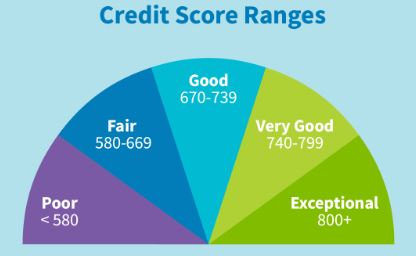

In [18]:
# Create tier of CreditScore based on skor FICO

def CreditScore_status(score):
  if score < 580: return "Poor"
  elif 580 <= score <= 669: return "Fair"
  elif 670 <= score <= 739: return "Good"
  elif 740 <= score <= 799: return "Very Good"
  else: return "Exceptional"

credit_status = df['CreditScore'].apply(CreditScore_status)
df.insert(loc=2, column='CreditScore_status', value=(credit_status))
df.head()

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Fair,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Fair,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Poor,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Good,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Exceptional,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


DataFrame di atas sudah bertambah satu kolom baru yang bernama *CreditScore_status* yang valuenya diisi oleh hasil pengklasifikasian masing-masing skor-nya berdasarkan kolom CreditScore.

### 2) Age

Disini Saya akan mengklasifikasikan umur nasabah ke dalam 4 kategori (young adults, middle-aged adults, older adults, early elderly) berdasarkan QIR (Quarter Interval Range) pada kolom Age. Disini Saya akan menampilkan terlebih dahulu ringkasan statistik dari kolom Age:<br>

In [19]:
# Descriptive statistical information that refers to Age column
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [20]:
# Create tier of Age based on it's QIR (quarter interval range)
def age_status(age):
  if age <= 32: return "young adults"
  elif age <= 37: return "middle-aged adults"
  elif age <= 44: return "older adults"
  else: return "early elderly"

age_status = df['Age'].apply(age_status)
df.insert(loc=6, column='Age_status', value=(age_status))
df.head()

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Fair,France,Female,42,older adults,2,0.00,1,1,1,101348.88,1
1,15647311,608,Fair,Spain,Female,41,older adults,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Poor,France,Female,42,older adults,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Good,France,Female,39,older adults,1,0.00,2,0,0,93826.63,0
4,15737888,850,Exceptional,Spain,Female,43,older adults,2,125510.82,1,1,1,79084.10,0


DataFrame di atas sudah bertambah satu kolom baru yang bernama *Age_status* yang valuenya diisi oleh hasil pengklasifikasian masing-masing umur nasabah berdasarkan kolom Age.

### 3) Tenure

Disini Saya akan mengklasifikasikan Tenure (berapa tahun nasabah sudah menggunakan produk & layanan bank) ke dalam 4 level kategori (very low, low, medium, high) berdasarkan QIR (Quarter Interval Range) pada kolom Tenure. Disini Saya akan menampilkan terlebih dahulu ringkasan statistik dari kolom Tenure:<br>

In [21]:
# Descriptive statistical information that refers to Tenure column
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [22]:
# Create tier of Tenure based on it's QIR (quarter interval range)
def tenure_status(tenure):
  if tenure <= 3: return "very low"
  elif tenure <= 5: return "low"
  elif tenure <= 7: return "medium"
  else: return "high"

tenure_status = df['Tenure'].apply(tenure_status)
df.insert(loc=8, column='Tenure_status', value=(tenure_status))
df.head()

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Tenure_status,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Fair,France,Female,42,older adults,2,very low,0.00,1,1,1,101348.88,1
1,15647311,608,Fair,Spain,Female,41,older adults,1,very low,83807.86,1,0,1,112542.58,0
2,15619304,502,Poor,France,Female,42,older adults,8,high,159660.80,3,1,0,113931.57,1
3,15701354,699,Good,France,Female,39,older adults,1,very low,0.00,2,0,0,93826.63,0
4,15737888,850,Exceptional,Spain,Female,43,older adults,2,very low,125510.82,1,1,1,79084.10,0


DataFrame di atas sudah bertambah satu kolom baru yang bernama *Tenure_status* yang valuenya diisi oleh hasil pengklasifikasian masing-masing durasi waktu lamanya nasabah menggunakan produk & layanan Bank berdasarkan kolom Tenure.

### 4) Balance

Disini Saya akan mengklasifikasikan Balance (saldo bank nasabah) ke dalam 2 level kategori (above, below) berdasarkan nilai mean (rata-rata dari saldo nasabah). Disini Saya akan menghitung terlebih dahulu nilai rata-rata dari saldo bank nasabah:<br>

In [23]:
# get the mean of Balance
Balance_MEAN = df['Balance'].mean()
Balance_MEAN

76485.889288

In [24]:
# Create tier based on Balance based on average, whether below or above average
def balance_status(saldo):
  if saldo >= Balance_MEAN:
    return 'above'
  else:
    return 'below'

balance_status = df['Balance'].apply(balance_status)
df.insert(loc=10, column='Balance_status', value=(balance_status))
df.head()

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Tenure_status,Balance,Balance_status,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Fair,France,Female,42,older adults,2,very low,0.00,below,1,1,1,101348.88,1
1,15647311,608,Fair,Spain,Female,41,older adults,1,very low,83807.86,above,1,0,1,112542.58,0
2,15619304,502,Poor,France,Female,42,older adults,8,high,159660.80,above,3,1,0,113931.57,1
3,15701354,699,Good,France,Female,39,older adults,1,very low,0.00,below,2,0,0,93826.63,0
4,15737888,850,Exceptional,Spain,Female,43,older adults,2,very low,125510.82,above,1,1,1,79084.10,0


DataFrame di atas sudah bertambah satu kolom baru yang bernama *Balance_status* yang valuenya diisi oleh hasil pengklasifikasian masing-masing saldo nasabah di Bank berdasarkan kolom Balance.

### 5) EstimatedSalary

Disini Saya akan mengklasifikasikan EstimatedSalary (pendapatan nasabah) ke dalam 2 level kategori (high, low) berdasarkan nilai mean (rata-rata dari pendapatan nasabah). Disini Saya akan menghitung terlebih dahulu nilai rata-rata dari pendapatan nasabah:

In [25]:
# get the mean of EstimatedSalary
Salary_MEAN = df['EstimatedSalary'].mean()
Salary_MEAN

100090.239881

In [26]:
# Create tier based on EstimatedSalary based on average, whether high or low
def salary_status(salary):
  if salary >= Salary_MEAN:
    return 'high'
  else:
    return 'low'

salary_status = df['EstimatedSalary'].apply(salary_status)
df.insert(loc=15, column='Salary_status', value=(salary_status))
df.head()

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Tenure_status,Balance,Balance_status,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Salary_status,Exited
0,15634602,619,Fair,France,Female,42,older adults,2,very low,0.00,below,1,1,1,101348.88,high,1
1,15647311,608,Fair,Spain,Female,41,older adults,1,very low,83807.86,above,1,0,1,112542.58,high,0
2,15619304,502,Poor,France,Female,42,older adults,8,high,159660.80,above,3,1,0,113931.57,high,1
3,15701354,699,Good,France,Female,39,older adults,1,very low,0.00,below,2,0,0,93826.63,low,0
4,15737888,850,Exceptional,Spain,Female,43,older adults,2,very low,125510.82,above,1,1,1,79084.10,low,0


DataFrame di atas sudah bertambah satu kolom baru yang bernama *Salary_status* yang valuenya diisi oleh hasil pengklasifikasian masing-masing pendapatan nasabah berdasarkan kolom EstimatedSalary.

## v.4 Replacing values

Untuk memudahkan dalam memahami isi dari data dan eksplorasi data, Saya memutuskan untuk menggantikan value binary yang terdapat di 3 kolom (*HasCrCard, IsActiveMember,* dan *Exited*) dengan value kategorikal, dimana value yang sebelumnya bernilai **0** digantikan dengan `No`, sedangkan yang bernilai **1** digantikan dengan `Yes`.

In [27]:
# Replacing binary values of column
df.replace({'HasCrCard' : {0 : 'No', 1 : 'Yes'}}, inplace=True)
df.replace({'IsActiveMember' : {0 : 'No', 1 : 'Yes'}}, inplace=True)
df.replace({'Exited' : {0 : 'No', 1 : 'Yes'}}, inplace=True)

In [28]:
# Review the top rows
df.head()

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Tenure_status,Balance,Balance_status,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Salary_status,Exited
0,15634602,619,Fair,France,Female,42,older adults,2,very low,0.00,below,1,Yes,Yes,101348.88,high,Yes
1,15647311,608,Fair,Spain,Female,41,older adults,1,very low,83807.86,above,1,No,Yes,112542.58,high,No
2,15619304,502,Poor,France,Female,42,older adults,8,high,159660.80,above,3,Yes,No,113931.57,high,Yes
3,15701354,699,Good,France,Female,39,older adults,1,very low,0.00,below,2,No,No,93826.63,low,No
4,15737888,850,Exceptional,Spain,Female,43,older adults,2,very low,125510.82,above,1,Yes,Yes,79084.10,low,No


In [29]:
# Check shape dataset
df.shape

(10000, 17)

Setelah dilakukan data cleaning & data preprocessing, sekrang kita mempunyai dataFrame dengan 10.000 baris dan 17 kolom.

## v.5 Export dataFrame to csv

In [30]:
# Export dataFrame
df_csv = df.to_csv('/content/drive/MyDrive/Milestone.csv', index=False)
df_csv

# vi. Analysis and Calculations

## vi.1 Eksplorasi data

### Get unique value

Sekarang Saya ingin mengetahui apa saja unique value dari setiap variabel:

In [31]:
# Get unique value of each variable
variable = df[['CreditScore_status', 'Geography', 'Gender', 'Age_status', 'Tenure_status', 'Balance_status', 'Salary_status', 'HasCrCard', 'IsActiveMember', 'Exited']]

for col in variable:
  print(col)
  print(df[col].unique())
  print(' ')

CreditScore_status
['Fair' 'Poor' 'Good' 'Exceptional' 'Very Good']
 
Geography
['France' 'Spain' 'Germany']
 
Gender
['Female' 'Male']
 
Age_status
['older adults' 'early elderly' 'young adults' 'middle-aged adults']
 
Tenure_status
['very low' 'high' 'medium' 'low']
 
Balance_status
['below' 'above']
 
Salary_status
['high' 'low']
 
HasCrCard
['Yes' 'No']
 
IsActiveMember
['Yes' 'No']
 
Exited
['Yes' 'No']
 


### Get proporsi of each variable

Disini Saya ingin mengetahui proporsi dari setiap karakteristik nasabah:

In [32]:
# get proportion per CreditScore_status
df.groupby('CreditScore_status').size() / tot_data * 100

CreditScore_status
Exceptional     6.55
Fair           33.31
Good           24.28
Poor           23.62
Very Good      12.24
dtype: float64

In [33]:
# get proportion per Geography
df.groupby('Geography').size() / tot_data * 100

Geography
France     50.14
Germany    25.09
Spain      24.77
dtype: float64

In [34]:
# get proportion per Gender
df.groupby('Gender').size() / tot_data * 100

Gender
Female    45.43
Male      54.57
dtype: float64

In [35]:
# get proportion per Age_status
df.groupby('Age_status').size() / tot_data * 100

Age_status
early elderly         23.40
middle-aged adults    22.97
older adults          25.73
young adults          27.90
dtype: float64

In [36]:
# get proportion per Tenure_status
df.groupby('Tenure_status').size() / tot_data * 100

Tenure_status
high        24.99
low         20.01
medium      19.95
very low    35.05
dtype: float64

In [37]:
# get proportion per Balance_status
df.groupby('Balance_status').size() / tot_data * 100

Balance_status
above    59.19
below    40.81
dtype: float64

In [38]:
# get proportion per Salary_status
df.groupby('Salary_status').size() / tot_data * 100

Salary_status
high    50.07
low     49.93
dtype: float64

In [39]:
# get proportion per HasCrCard
df.groupby('HasCrCard').size() / tot_data * 100

HasCrCard
No     29.45
Yes    70.55
dtype: float64

In [40]:
# get proportion per IsActiveMember
df.groupby('IsActiveMember').size() / tot_data * 100

IsActiveMember
No     48.49
Yes    51.51
dtype: float64

In [41]:
# get proportion per Exited
df.groupby('Exited').size() / tot_data * 100

Exited
No     79.63
Yes    20.37
dtype: float64

Dari informasi di atas, kita dapat mengetahui bahwa mayoritas nasabah mempunyai karakteristik sebagai berikut:<br>
- mempunyai skor kredit di level fair (580-669),
- berasal dari negara France,
- berjenis kelamin male,
- mempunyai umur di level young adults (<= 32 tahun),
- menggunakan produk & layanan dalam durasi di level very low (<= 3 tahun),
- mempunyai saldo bank di level above (di atas rata-rata yaitu >= 76.485,88),
- mempunyai pendapatan di level high (di atas rata-rata yaitu >= 100.090,23),
- memegang kartu kredit,
- status nasabah aktif,
- status nasabah retained (loyal customer).

### Relasi terhadap churn

Selanjutnya, Saya akan melihat secara independent setiap variabel, mana yang memiliki presentase churn yang banyak sebagai sebuah karakteristik grup tersebut:

In [42]:
# distribution of CreditScore_status + Exited (in percentage)
df.groupby(['CreditScore_status', 'Exited']).size() / tot_data * 100

CreditScore_status  Exited
Exceptional         No         5.27
                    Yes        1.28
Fair                No        26.46
                    Yes        6.85
Good                No        19.76
                    Yes        4.52
Poor                No        18.42
                    Yes        5.20
Very Good           No         9.72
                    Yes        2.52
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang memiliki skor kredit di level Fair (580-669) sebesar 6.85% lebih signifikan.

In [43]:
# distribution of Geography + Exited (in percentage)
df.groupby(['Geography', 'Exited']).size() / tot_data * 100

Geography  Exited
France     No        42.04
           Yes        8.10
Germany    No        16.95
           Yes        8.14
Spain      No        20.64
           Yes        4.13
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang berasal dari negara Germany sebesar 8.14% lebih signifikan.

In [44]:
# distribution of Gender + Exited (in percentage)
df.groupby(['Gender', 'Exited']).size() / tot_data * 100

Gender  Exited
Female  No        34.04
        Yes       11.39
Male    No        45.59
        Yes        8.98
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang berjenis kelamin female sebesar 11.39% lebih signifikan.

In [45]:
# distribution of Age_status + Exited (in percentage)
df.groupby(['Age_status', 'Exited']).size() / tot_data * 100

Age_status          Exited
early elderly       No        12.96
                    Yes       10.44
middle-aged adults  No        20.48
                    Yes        2.49
older adults        No        20.42
                    Yes        5.31
young adults        No        25.77
                    Yes        2.13
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang status umur-nya di level early elderly (>44 tahun) sebesar 10.44% lebih signifikan.

In [46]:
# distribution of Tenure_status + Exited (in percentage)
df.groupby(['Tenure_status', 'Exited']).size() / tot_data * 100

Tenure_status  Exited
high           No        19.88
               Yes        5.11
low            No        15.89
               Yes        4.12
medium         No        16.22
               Yes        3.73
very low       No        27.64
               Yes        7.41
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang status tenure-nya di level very low (<= 3 tahun) sebesar 7.41% lebih signifikan.



In [47]:
# distribution of Balance_status + Exited (in percentage)
df.groupby(['Balance_status', 'Exited']).size() / tot_data * 100

Balance_status  Exited
above           No        44.93
                Yes       14.26
below           No        34.70
                Yes        6.11
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang status balance-nya di level above (di atas rata-rata yaitu >= 76.485,88) sebesar 14.26% lebih signifikan.

In [48]:
# distribution of HasCrCard + Exited (in percentage)
df.groupby(['HasCrCard', 'Exited']).size() / tot_data * 100

HasCrCard  Exited
No         No        23.32
           Yes        6.13
Yes        No        56.31
           Yes       14.24
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang memegang kartu kredit sebesar 14.24% lebih signifikan.

In [49]:
# distribution of IsActiveMember + Exited (in percentage)
df.groupby(['IsActiveMember', 'Exited']).size() / tot_data * 100

IsActiveMember  Exited
No              No        35.47
                Yes       13.02
Yes             No        44.16
                Yes        7.35
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang tidak aktif sebesar 13.02% lebih signifikan.

In [50]:
# distribution of Salary_status + Exited (in percentage)
df.groupby(['Salary_status', 'Exited']).size() / tot_data * 100

Salary_status  Exited
high           No        39.65
               Yes       10.42
low            No        39.98
               Yes        9.95
dtype: float64

Apakah ada pola yang menonjol?

A: Ya, presentase churn nasabah yang status salary-nya high (di atas rata-rata yaitu >= 100.090,23) sebesar 10.42% lebih signifikan.

Dari analisa sederhana yang sudah kita lakukan, maka terdapat karakteristik yang cukup menonjol dari nasabah yang churn, yaitu:<br>
1. Skor kreditnya di level **Fair** (580-669),
2. Berasal dari negara **Germany**,
3. Berjenis kelamin **female**,
4. Status umurnya di level **early elderly** (>44 tahun),
5. Status tenure-nya (durasi) di level **very low** (<= 3 tahun),
6. Status balance-nya (saldo bank) di level **above** (di atas rata-rata yaitu >= 76.485,88),
7. Nasabah yang **memegang kartu kredit**,
8. Nasabah yang **tidak aktif**,
9. Status salary-nya **high** (di atas rata-rata yaitu >= 100.090,23).<br>

Karakteristik di atas belum ditetapkan sebagai karakteristik yang benar-benar signifikan dari nasabah yang churn. Setelah ini, kita akan buktikan dengan visualisasi data dan analisis statistik, apakah saja karakteristik yang benar-benar signifikan. 

## vi.2 Visualisasi data

Visualisasi data di sini adalah tujuan utama kita untuk mendapatkan pemahaman tentang bagaimana atribut yang diberikan berhubungan dengan status 'Exited' atau yang bisa disebut dengan *churn*.

### 1) Berapa persentase persebaran data dari masing-masing nasabah yang churned dan retained berdasarkan seluruh data?

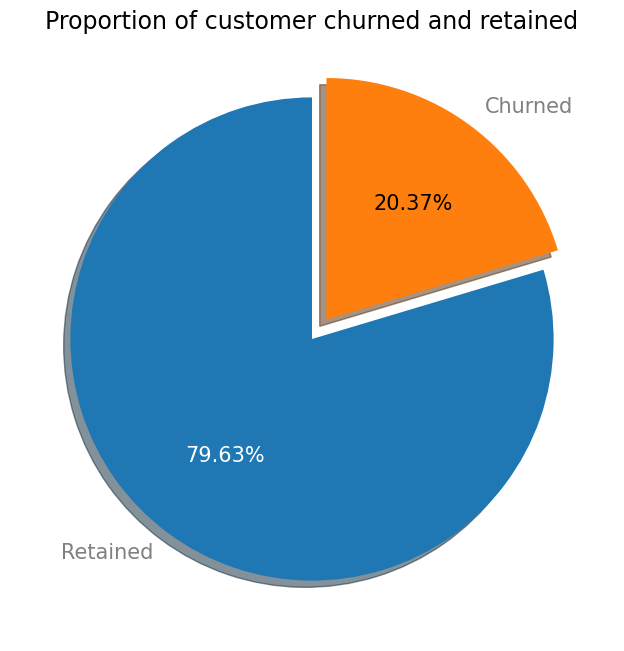

In [51]:
# Visualize customer churned & retained percentage in dataset
values = df.Exited.value_counts()
labels = ['Retained', 'Churned']

fig, ax = plt.subplots(figsize = (10, 8), dpi = 100)
explode = (0, 0.1)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, size = 15, color = 'grey')
plt.setp(autotexts, size = 15, color = 'white')
autotexts[1].set_color('black')
plt.title("Proportion of customer churned and retained", size = 17)
plt.show()

Berdasarkan pie chart di atas, dapat disimpulkan bahwa sebaran data secara mayoritas nasabah tidak melakukan Churn, dengan detail Churn sebanyak 20,37% dan No Churn sebanyak 79,63%.

### 2) Bagaimana karakteristik yang menonjol dari kelompok nasabah yang churn? Kemudian, urutkan juga 3 negara dari yang potensi churnnya tertinggi untuk menjadi negara prioritas yang diatasi terlebih dahulu.


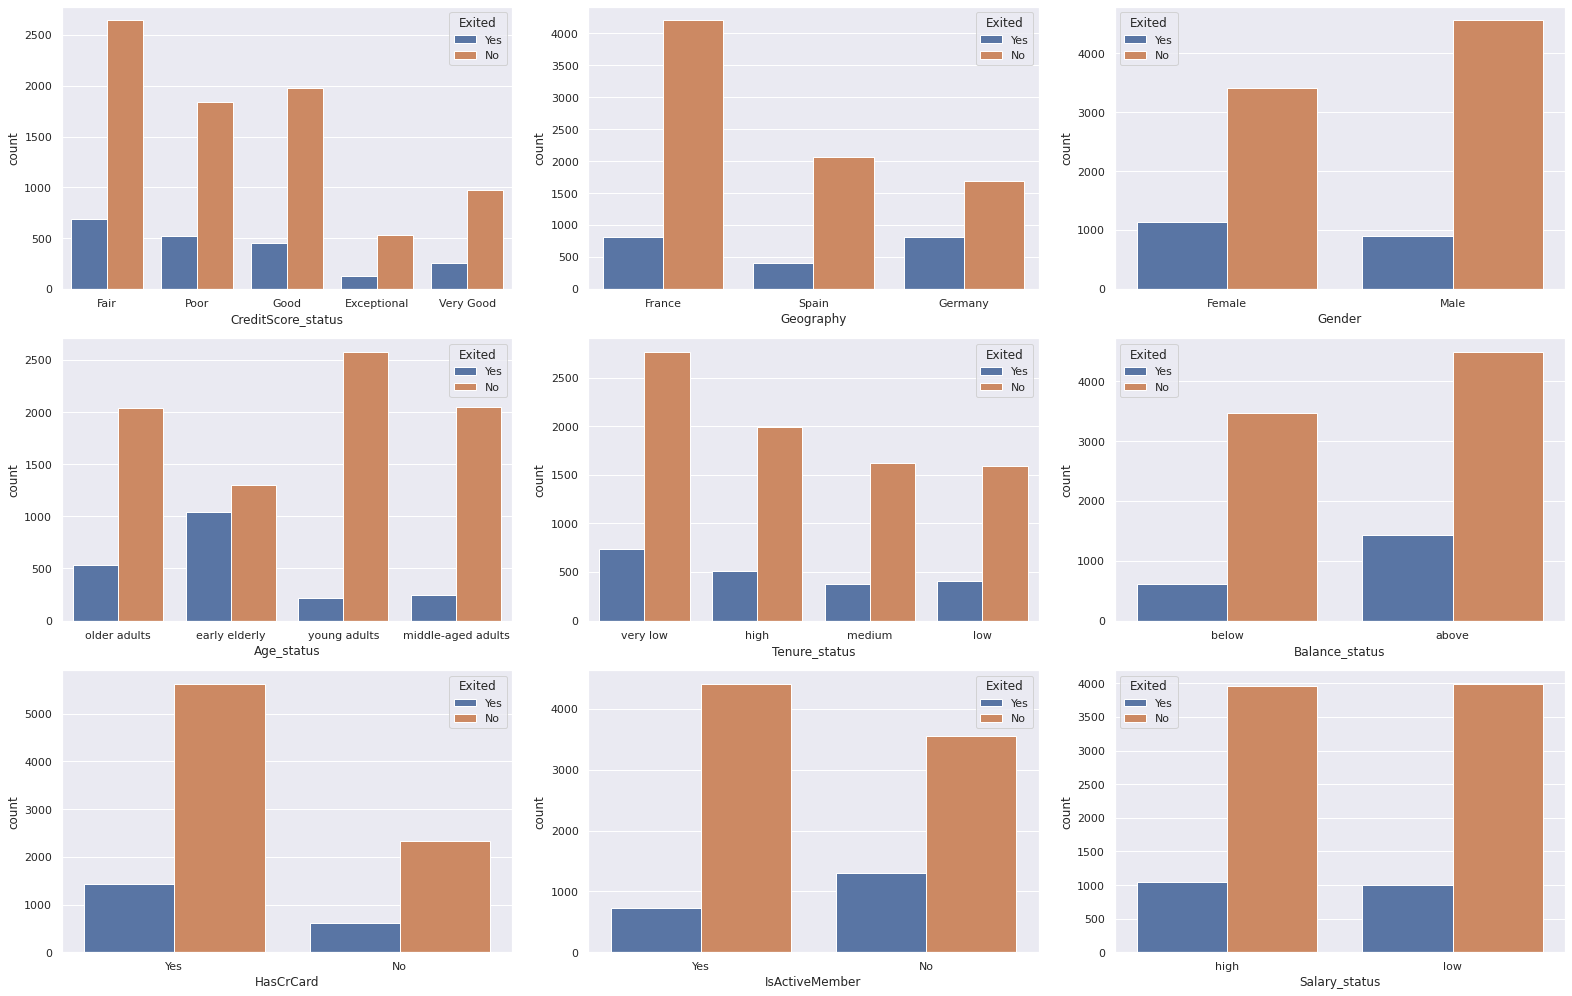

In [52]:
sns.set(style='darkgrid')
# memplot data dengan subplot ukuran 3x3
fig, ax = plt.subplots(3, 3, figsize=(22, 14))
# menampilkan data berdasarkan variabel-variabel kategorikal yang ada
sns.countplot(data=df, x='CreditScore_status', hue='Exited', ax=ax[0][0])
sns.countplot(data=df, x='Geography', hue='Exited', ax=ax[0][1])
sns.countplot(data=df, x='Gender', hue='Exited', ax=ax[0][2])
sns.countplot(data=df, x='Age_status', hue='Exited', ax=ax[1][0])
sns.countplot(data=df, x='Tenure_status', hue='Exited', ax=ax[1][1])
sns.countplot(data=df, x='Balance_status', hue='Exited', ax=ax[1][2])
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=ax[2][0])
sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=ax[2][1])
sns.countplot(data=df, x='Salary_status', hue='Exited', ax=ax[2][2])
plt.tight_layout()
plt.show()

Berdasarkan bar chart di atas, dapat disimpulkan bahwa:<br>
1. Disini terlihat bahwa nasabah yang churn itu yang memiliki status skor kredit di level fair (580-669). Namun faktor ini tidak berbeda secara sginifikan antara nasabah yang churn dengan nasabah yang retain.
2. Seperti yang diketahui dari eksplorasi data sebelumnya, bahwa sebagian besar nasabah berasal dari Perancis. Namun dari visualisasi data di sini, diketahui bahwa sebagian besar nasabah yang churned berasal dari negara Jerman. Disini kita dapat berasumsi mungkin sumber daya pelayanan untuk nasabah tidak cukup dialokasikan di area di mana bank tersebut memiliki lebih sedikit klien.
3. Proporsi nasabah perempuan yang churn lebih besar dibandingkan nasabah laki-laki.
4. Seperti yang diketahui dari eksplorasi data sebelumnya, bahwa sebagian besar nasabah mempunyai umur di level young adults (<=32 tahun). Namun dari visualisasi data di sini, diketahui bahwa sebagian besar nasabah yang churned mempunyai umur di level early elderly (>44 tahun). 
5. Seperti yang diketahui dari eksplorasi data sebelumnya, bahwa nasabah yang churn yaitu yang sudah menggunakan produk&layanan dalam durasi waktu di level very low (<= 3 tahun). Namun jika dilihat dari visualisasi data disini bahwa ternyata tidak berbeda secara signifikan antara tenure nasabah yang churn dengan retain dan tingkat churning juga terlihat tinggi antara very low sampai high.
6. Disini terlihat bahwa nasabah yang churn memiliki status balance-nya (saldo bank) di level above (di atas rata-rata yaitu >= 76.485,88).
7. Menariknya, mayoritas nasabah yang melakukan churn adalah mereka yang memiliki kartu kredit. Mengingat sebagian besar nasabah memiliki kartu kredit dapat membuktikan bahwa ini hanya kebetulan. Jadi dapat dikatakan juga bahwa faktor ini tidak terlalu signifikan jika dibandingkan dengan nasabah yang retained.
8. Disini terlihat bahwa nasabah yang tidak aktif memiliki tingkat churn yang lebih besar. 
9. Seperti yang diketahui dari eksplorasi data sebelumnya, bahwa sebagian besar nasabah mempunyai pendapatan di level high (di atas rata-rata yaitu >= 100.090,23). Namun jika dilihat dari visualisasi data disini bahwa ternyata tidak berbeda secara signifikan antara salary nasabah yang churn dengan retain.

Dari penjabaran informasi yang sudah kita dapatkan di atas, maka dapat disimpulkan bahwa karakteristik yang menonjol dari nasabah yang churn sesungguhnya adalah:
1. Berasal dari negara **Germany**,
2. Berjenis kelamin **female**,
3. Status umurnya di level **early elderly** (>44 tahun),
4. Status balance-nya (saldo bank) di level **above** (di atas rata-rata yaitu >= 76.485,88).
5. Nasabah yang **tidak aktif**.<br>

Berdasarkan visualisasi data di atas, kita dapat mengurutkan 3 negara dari yang potensi churnnya tertinggi, yaitu:
1. Germany,
2. France,
3. Spain.


### 3) Berdasarkan dari variabel yang kontinyu, apakah ada informasi tambahan yang mengacu pada karakteristik nasabah yang churn?

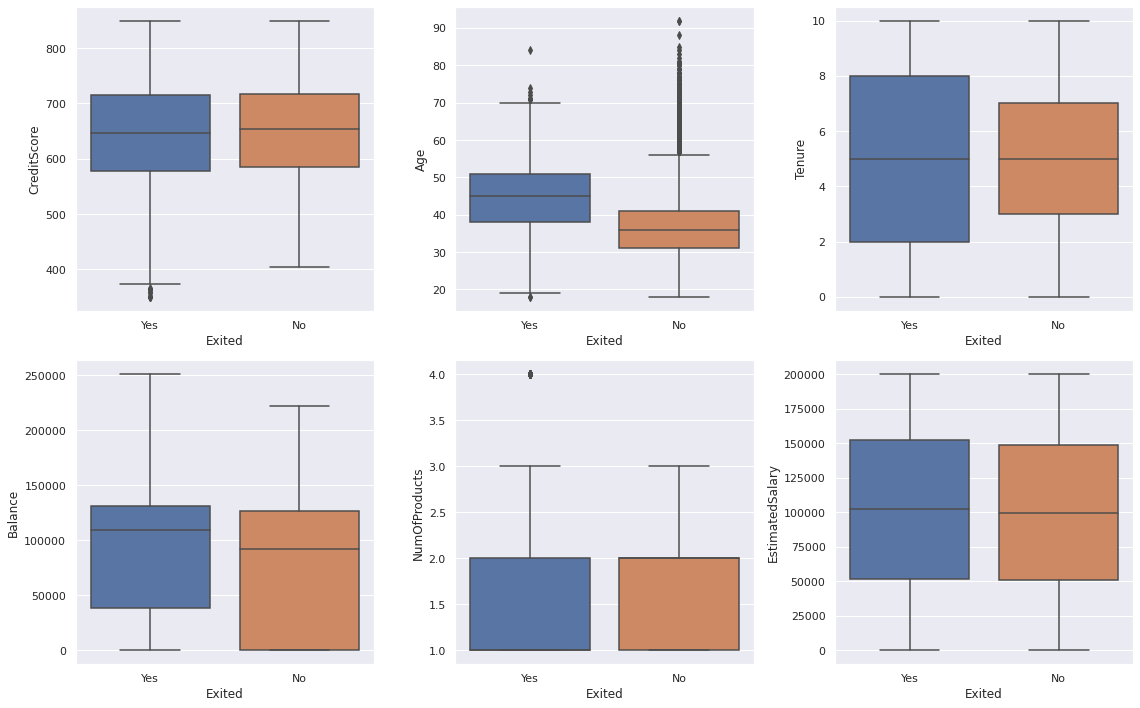

In [53]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 3, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = df, ax = ax[0][2])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = df, ax = ax[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][2])

plt.tight_layout()
plt.show()

Berdasarkan box plot di atas, dapat disimpulkan bahwa: <br>
1. Tidak ada perbedaan yang signifikan dalam distribusi skor kredit antara nasabah yang retained dan pelanggan yang churned.<br>
2. Nasabah yang lebih tua mempunyai tingkat churn yang lebih banyak daripada nasabah yang lebih muda. Mungkin saja ini bisa mengacu pada perbedaan preferensi layanan dalam kategori usia. Sebaiknya,pihak Bank perlu meninjau target pasarnya atau meninjau strategi retensi di antara kelompok usia yang berbeda.<br>
3. Berkenaan dengan lamanya nasabah menggunakan produk & jasa, nasabah di kedua ujung ekstrim (baik yanh sudah menghabiskan sedikit waktu dengan bank atau banyak waktu dengan bank) lebih cenderung untuk churn dibandingkan dengan mereka yang memiliki durasi waktu dalam rata-rata, namun tidak berpengaruh signifikan.<br>
4. Nasabah yang memiliki saldo bank yang signifikan yang mempunyai tingkat churn yang tinggi.<br>
5. Baik jumlah produk yang digunakan nasabah maupun pendapatan nasabah, keduanya tidak berpengaruh signifikan terhadap kemungkinan terjadinya churn.<br>

Berdasarkan dari variabel yang kontinyu ini, kita tidak mendapatkan informasi tambahan yang mengacu pada karakteristik nasabah yang secara signifikan berpotensi churn.


### 4) Divisi Marketing ingin meninjau kembali strategi retensi di antara kelompok usia yang berbeda. Carilah range umur yang signifikan mengacu pada nasabah yang churn dan retain, agar strategi lebih tepat sasaran.

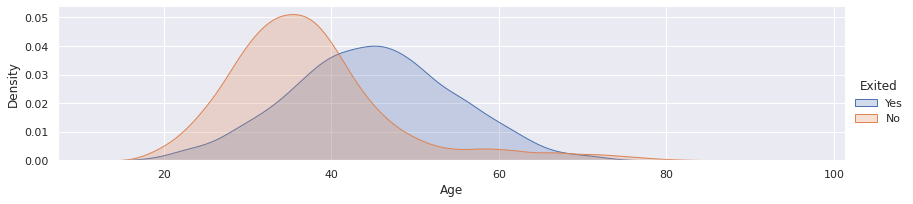

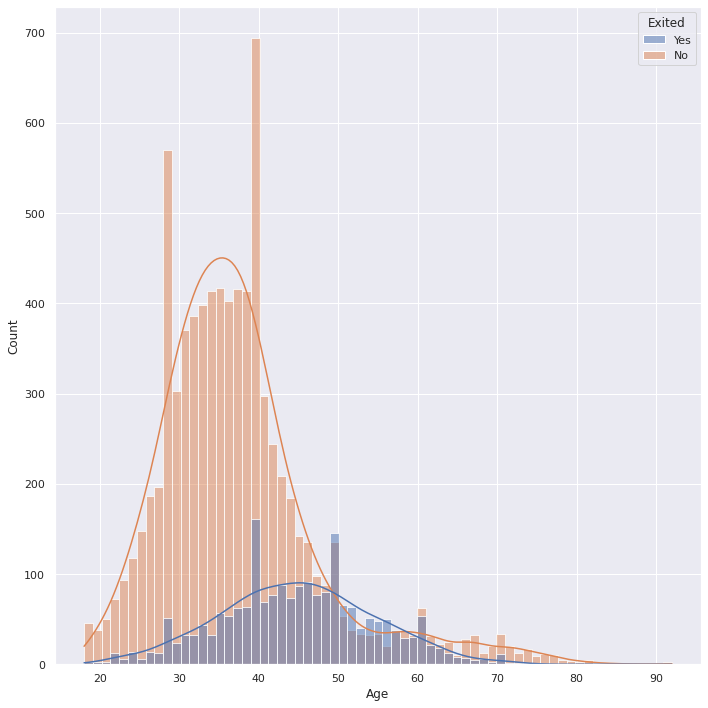

In [54]:
# Distribution of data 'Age' to 'Exited'
facet = sns.FacetGrid(df, hue = 'Exited', aspect = 4)
facet.map(sns.kdeplot, "Age", shade= True)
facet.add_legend()
plt.show()

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = df, x = "Age", kde = True, hue = "Exited")

Berdasarkan distribusi data *Age* terhadap *Exited* dapat terlihat bahwa tingkat nasabah churned paling banyak ada pada kisaran range umur 40-50 tahun sementara di bawah umur 40 tahun dan di atas umur 50 tahun rata-rata nasabah retained.

## vi.3 Statistical analysis

### Statistik deskriptif

### 5) Pada poin nomor 4 sudah mendapatkan range umur nasabah yang signifikan churn dan retain dari data keseluruhan. Silakan gunakan data yang sama untuk mendeteksi outlier pada kolom *Age*, kemudian lanjutkan untuk menjawab poin nomor 6.

In [55]:
# Create a function to print the skewness
def print_skewness(data):
    print (f'\'{data.name}\' skewness: {data.skew()}')
    if data.skew() > 0.5:
        print ("right skewed")
    elif data.skew() < -0.5:
        print( "Left Skewed")
    else:
        print("Normal Distribution")

In [56]:
from scipy.stats import norm
# Create a function to visualize the data
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=25, rwidth=1, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Count')
    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))
    # Label the plot
    plt.legend(['Normal PDF(Probability Density Function) ', 'Histogram'])
    plt.axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(data.mode()[0], color='red', linestyle='dashed', linewidth=2)
    plt.show()

'Age' skewness: 1.0113202630234552
right skewed


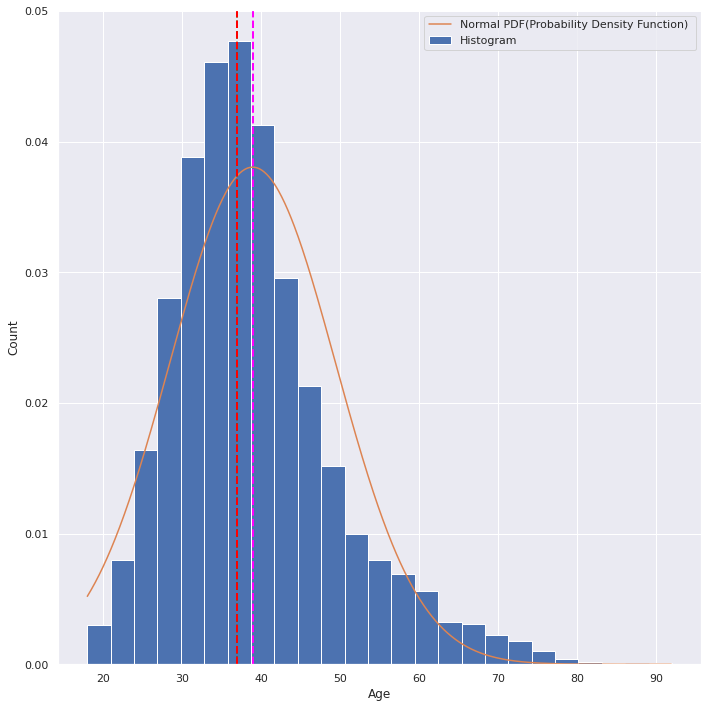

In [57]:
# Execute the function by entering data
visualize_data(df["Age"])

Notes:
- Magenta line: mean dari *Age*.
- Green line: median dari *Age*.
- Red line: mode dari *Age*.<br>

Perhatikan bahwa *density line* menunjukkan bahwa data terdistribusi ***'right skewed'*** dengan nilai skewness yaitu 1.01. Jika dilihat pada plot di atas, kondisi Right-skewed ini menarik nilai mean ke kanan karena adanya nilai data yang tinggi dan jarang terjadi sehingga `mode < median < mean`. 

Karena distribusi data-nya tidak normal *(skewed distribution)*, maka kita bisa mendeteksi dan menghapus outlier dengan menggunakan `Tukey's rule`:

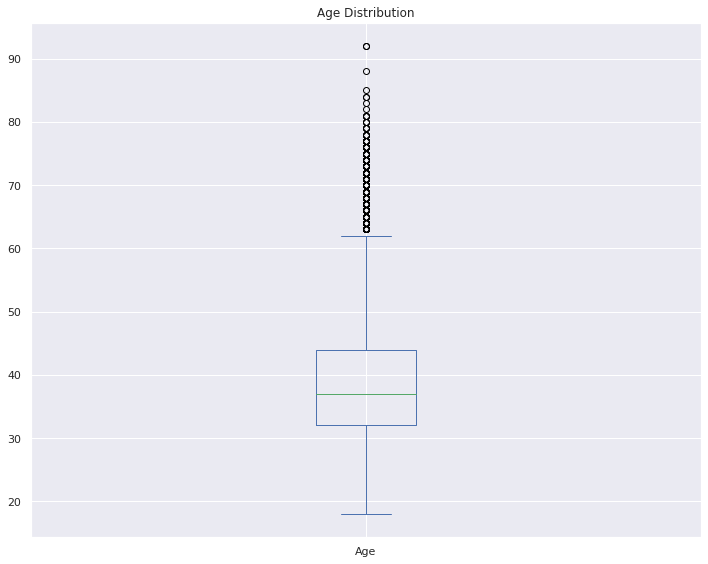

In [58]:
# display the outliers in the box plot
df['Age'].plot(kind='box', title='Age Distribution', figsize=(10,8))
plt.show()

Jika dilihat dari box plot di atas menunjukkan bahwa terdapat banyak outlier pada nasabah yang lansia. Setelah ini, Saya membuktikan adanya outlier menggunakan IQR:

In [59]:
# Compute the first and third quantiles
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
Q1, Q3

(32.0, 44.0)

In [60]:
# Compute the IQR 
IQR = Q3 - Q1
IQR

12.0

In [61]:
# Calculate the lower and upper cutoffs for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(14.0, 62.0)

In [62]:
# Subset df to find outliers
outliers = df[(df['Age']>upper_limit) | (df['Age']<lower_limit)] 
outliers

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Tenure_status,Balance,Balance_status,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Salary_status,Exited
58,15623944,511,Poor,Spain,Female,66,early elderly,4,low,0.00,below,1,Yes,No,1643.11,low,Yes
85,15805254,652,Fair,Spain,Female,75,early elderly,10,high,0.00,below,2,Yes,Yes,114675.75,high,No
104,15804919,670,Good,Spain,Female,65,early elderly,1,very low,0.00,below,1,Yes,Yes,177655.68,high,Yes
158,15589975,646,Fair,France,Female,73,early elderly,6,medium,97259.25,above,1,No,Yes,104719.66,high,No
181,15789669,510,Poor,France,Male,65,early elderly,2,very low,0.00,below,2,Yes,Yes,48071.61,low,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,15705174,656,Fair,Germany,Male,68,early elderly,7,medium,153545.11,above,1,Yes,Yes,186574.68,high,No
9765,15777067,445,Poor,France,Male,64,early elderly,2,very low,136770.67,above,1,No,Yes,43678.06,low,No
9832,15814690,595,Fair,Germany,Female,64,early elderly,2,very low,105736.32,above,1,Yes,Yes,89935.73,low,Yes
9894,15704795,521,Poor,France,Female,77,early elderly,6,medium,0.00,below,2,Yes,Yes,49054.10,low,No


In [63]:
# Percentage of outliers
total_data = df.shape[0]
percentage_outliers = len(outliers) / total_data * 100
print('Jumlah outliernya ada:', percentage_outliers, '%')

Jumlah outliernya ada: 3.5900000000000003 %


In [64]:
# Subset df to find dataFrame no outliers
df_no_outlier = df[~(df['Age']>upper_limit) & ~(df['Age']<lower_limit)] 
df_no_outlier

,CustomerId,CreditScore,CreditScore_status,Geography,Gender,Age,Age_status,Tenure,Tenure_status,Balance,Balance_status,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Salary_status,Exited
0,15634602,619,Fair,France,Female,42,older adults,2,very low,0.00,below,1,Yes,Yes,101348.88,high,Yes
1,15647311,608,Fair,Spain,Female,41,older adults,1,very low,83807.86,above,1,No,Yes,112542.58,high,No
2,15619304,502,Poor,France,Female,42,older adults,8,high,159660.80,above,3,Yes,No,113931.57,high,Yes
3,15701354,699,Good,France,Female,39,older adults,1,very low,0.00,below,2,No,No,93826.63,low,No
4,15737888,850,Exceptional,Spain,Female,43,older adults,2,very low,125510.82,above,1,Yes,Yes,79084.10,low,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Very Good,France,Male,39,older adults,5,low,0.00,below,2,Yes,No,96270.64,low,No
9996,15569892,516,Poor,France,Male,35,middle-aged adults,10,high,57369.61,below,1,Yes,Yes,101699.77,high,No
9997,15584532,709,Good,France,Female,36,middle-aged adults,7,medium,0.00,below,1,No,Yes,42085.58,low,Yes
9998,15682355,772,Very Good,Germany,Male,42,older adults,3,very low,75075.31,below,2,Yes,No,92888.52,low,Yes


In [65]:
# Check shape dataFrame
df_no_outlier.shape

(9641, 17)

Dari informasi di atas menunjukkan bahwa terdapat 9.641 baris data yang sudah bersih dari outlier pada kolom Age.

'Age' skewness: 0.49040913720911106
Normal Distribution


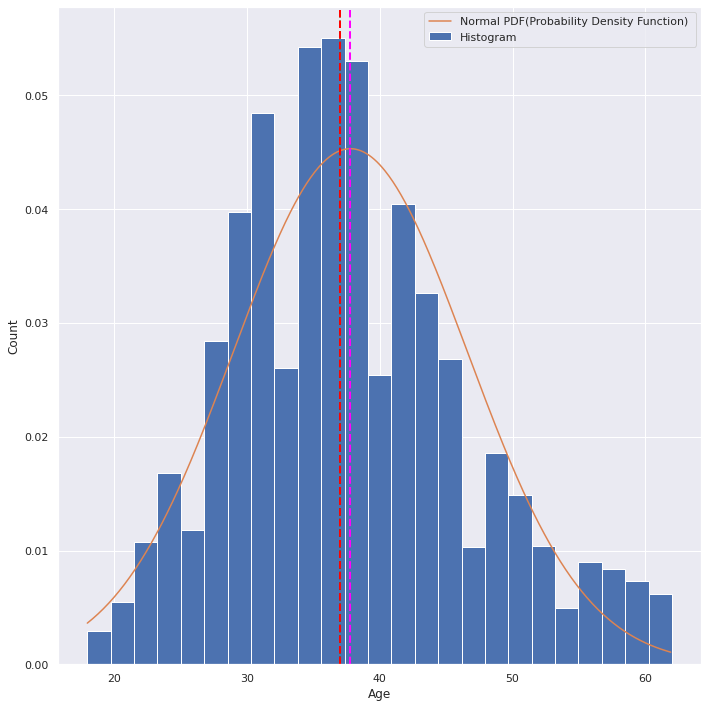

In [66]:
# Execute the function by entering data
visualize_data(df_no_outlier["Age"])

In [67]:
# Central tendency of Age without outlier
mean_with_out = df_no_outlier['Age'].mean()
median_with_out = df_no_outlier['Age'].median()
mode_with_out = df_no_outlier['Age'].mode()

print('mean Age without oulier :', mean_with_out)
print('median Age without oulier :', median_with_out)
print('modus Age without oulier :', mode_with_out)

mean Age without oulier : 37.79172285032673
median Age without oulier : 37.0
modus Age without oulier : 0    37
dtype: int64


In [68]:
# Central tendency of Age with outlier
mean = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()

print('mean Age with oulier :', mean)
print('median Age with oulier :', median)
print('modus Age with oulier :', mode)

mean Age with oulier : 38.9218
median Age with oulier : 37.0
modus Age with oulier : 0    37
dtype: int64


Ada perbedaan nilai mean pada hasil pengukuran central tendency sebelum dan sesudah outlier dikeluarkan, yang awalnya bernilai 38.92 menjadi 37.79. Kondisi ini berarti nilai mean menggeser ke kiri mendekati nilai median setelah outlier dikeluarkan. Sehingga, jika kita lihat plot distribusi nya sekarang menunjukkan bahwa data Age sudah terdistribusi normal dengan nilai skewness 0.49.

### Statistik inferensial

### 6) Gunakan data Age yang tidak ada outlier. Berikan analisa dan saran terkait berapa range umur nasabah yang cocok untuk strategi retensi nasabah yang churn dan retain.

In [69]:
# Calculation of confidence interval

ci = stats.norm.interval(0.90, df_no_outlier['Age'].mean(), df_no_outlier['Age'].std())
ci

(23.31187187674999, 52.271573823903466)

Saya membuat confidence interval dengan tingkat kepercayaan 90% bahwa umur nasabah rata-rata antara 23 tahun dan 52 tahun. Sehingga nilai interval inilah yang bisa menjadi saran ke marketing untuk fokus menerapkan strategi retensi nasabah dalam rentang umur 23-52 tahun.

### 7) Lakukan uji independensi antara dua data kategorikal menggunakan Chi-square untuk mengetahui hubungan antar variabel dengan churn. Yang mana kolom yang signifikan dengan kolom *Exited*?

Uji chi-square digunakan untuk menguji independensi antara dua data kategorikal. Karena statistik menangani data numerik, kita perlu menghitung frekuensi setiap variabel dan disajikan dalam tabel kontingensi.

In [70]:
# Uji chi-square antara data kategorikal dengan kolom target 'Exited'
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in df.select_dtypes(np.object).drop("Exited",axis=1).columns :
    tab = pd.crosstab(df[col],df['Exited'],margins = False)
    stat, p, dof, expected = scipy.stats.chi2_contingency(tab)
    if p<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,p,cm ])
print(t)

+--------------------+------------------------+-----------------+
|    Column Name     |        P Values        |  Interpretation |
+--------------------+------------------------+-----------------+
| CreditScore_status |  0.06271066748554825   | Not Significant |
|     Geography      | 3.8303176053541544e-66 |   Significant   |
|       Gender       | 2.2482100097131755e-26 |   Significant   |
|     Age_status     | 5.964955670284589e-272 |   Significant   |
|   Tenure_status    |  0.18722326299517406   | Not Significant |
|   Balance_status   |  1.19736351256435e-28  |   Significant   |
|     HasCrCard      |  0.49237236141554686   | Not Significant |
|   IsActiveMember   | 8.785858269303703e-55  |   Significant   |
|   Salary_status    |   0.2840144558842442   | Not Significant |
+--------------------+------------------------+-----------------+


<ipython-input-70-4e1f2be1f3ff>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df.select_dtypes(np.object).drop("Exited",axis=1).columns :


Dari informasi di atas dapat disimpulkan bahwa variabel yang signifikan dengan kolom *Exited* yaitu:
1. Geography,
2. Gender,
3. Age_status,
4. Balance_status,
5. IsActiveMember.<br>

Dimana kolom-kolom tersebut sudah relevan dengan hasil visualisasi data yang kita lakukan sebelumnya terkait karakteristik yang menonjol dari nasabah yang churn.

# vii. Conclusion

Dari keseluruhan data diketahui bahwa mayoritas nasabah yang tidak melakukan churn yaitu sebanyak 79,63% dan nasabah yang churn sebanyak 20,37%. Berdasarkan data ini, PT Bank TRX ingin mengurangi angka churn rate (persentase pelanggan yang berhenti menggunakan produk/layanan dan beralih ke kompetitor) agar tidak lebih dari 20% di 1 tahun kedepan. Dalam hal ini, Divisi Marketing di perusahaan ini ingin menerapkan strategi apa yang relevan terhadap karakteristik nasabah yang berpotensi churn agar strategi tersebut bisa tepat sasaran sehingga tidak membuang banyak waktu, tenaga, dan biaya. Untuk itu, memerlukan analisa terlebih dahulu karakteristik nasabah yang bagaimana yang berpotensi churn.<br>

Dari analisa eksplorasi dan visualisasi data yang sudah dilakukan sebelumnya, diperoleh informasi bahwa karakteristik yang menonjol dari nasabah yang churn sesungguhnya adalah:
1. Berasal dari negara **Germany**,
2. Berjenis kelamin **female**,
3. Status umurnya di level **early elderly** (>44 tahun),
4. Status balance-nya (saldo bank) di level **above** (di atas rata-rata yaitu >= 76.485,88).
5. Nasabah yang **tidak aktif**.<br>

Divisi ini juga ingin mengetahui 3 daftar negara dari yang mempunyai angka churn tertinggi untuk membuat time-bound menjalankan strategi dalam 1 tahun kedepan.
Berdasarkan visualisasi data sebelumnya, kita dapat mengurutkan 3 negara dari yang potensi churnnya tertinggi, yaitu:
1. Germany,
2. France,
3. Spain.<br>

Jadi, divisi marketing dapat menerapkan strategi retensi untuk mengurangi angka churn rate sebesar 2% untuk masing-masing negara tersebut dalam waktu 4 bulan pertama di negara Germany, 4 bulan berikutnya di negara France dan 4 bulan berikutnya lagi di negara Spain.<br>

Disini Saya menyaranakan ke divisi tersebut bahwa mungkin mereka bisa meninjau kembali strategi retensi di antara kelompok usia yang berbeda agar strategi lebih tepat sasaran. Sehingga Saya melakukan analisa lebih lanjut terkait range umur yang signifikan mengacu pada nasabah yang churn paling banyak ada pada kisaran 40-50 tahun, dan dengan tingkat kepercayaan 90% untuk keseluruhan nasabah baik yang churn dan retain Saya menyarankan untuk menerapkan strategi retensi pada nasabah yang rentang umurnya diantara 23-52 tahun.